# Importación de librerías

In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from sklearn.decomposition import KernelPCA

# Importación del conjunto de datos

In [59]:
data = pd.read_csv("../csv_excel/datos.csv", sep=',', index_col=0)

data.head(5)

,label,landmark_0_x,landmark_0_y,landmark_0_z,landmark_1_x,landmark_1_y,landmark_1_z,landmark_2_x,landmark_2_y,landmark_2_z,...,landmark_29_z,landmark_30_x,landmark_30_y,landmark_30_z,landmark_31_x,landmark_31_y,landmark_31_z,landmark_32_x,landmark_32_y,landmark_32_z
frame,,,,,,,,,,,,,,,,,,,,,
1.0,sentarse,0.496513,0.391797,-0.228675,0.497693,0.387753,-0.222847,0.498450,0.388126,-0.222853,...,0.012102,0.486108,0.583033,-0.033983,0.511950,0.588696,-0.015748,0.490280,0.591626,-0.065950
2.0,sentarse,0.496397,0.391697,-0.200978,0.497610,0.387340,-0.193793,0.498411,0.387566,-0.193820,...,-0.005365,0.486081,0.583744,-0.052926,0.511741,0.589572,-0.041306,0.489741,0.592514,-0.092338
3.0,sentarse,0.496019,0.390957,-0.172315,0.497260,0.386117,-0.166023,0.498138,0.386188,-0.166053,...,-0.024103,0.486075,0.584625,-0.048225,0.510231,0.589807,-0.066917,0.487988,0.594700,-0.090789
4.0,sentarse,0.495835,0.389214,-0.132569,0.497103,0.384293,-0.126539,0.498056,0.384327,-0.126565,...,-0.032235,0.486169,0.584586,-0.052476,0.510114,0.589376,-0.074378,0.488209,0.594773,-0.095094
5.0,sentarse,0.495808,0.388118,-0.100940,0.497033,0.383358,-0.095321,0.498029,0.383323,-0.095341,...,-0.065377,0.487016,0.584660,-0.074366,0.506574,0.589372,-0.108042,0.488177,0.594889,-0.116433


## Normalización

In [60]:
from sklearn.preprocessing import StandardScaler

# Crear una instancia de StandardScaler
scaler = StandardScaler()

# Seleccionar las columnas que deseas normalizar (excluyendo las columnas no numéricas si es necesario)
columns_to_normalize = data.select_dtypes(include=['float64', 'int64']).columns

# Resetear el índice del DataFrame para asegurar que los índices sean únicos
data_reset = data.reset_index(drop=True)

# Normalizar los datos
normalized_data = scaler.fit_transform(data_reset[columns_to_normalize])

# Crear un nuevo DataFrame con los datos normalizados
normalized_df = pd.DataFrame(normalized_data, columns=columns_to_normalize)

# Si deseas mantener las columnas no numéricas, puedes concatenarlas con el DataFrame normalizado
result_df_normalized = pd.concat([data_reset.drop(columns=columns_to_normalize), normalized_df], axis=1)

# Mostrar el DataFrame normalizado
data = result_df_normalized

data

,label,landmark_0_x,landmark_0_y,landmark_0_z,landmark_1_x,landmark_1_y,landmark_1_z,landmark_2_x,landmark_2_y,landmark_2_z,...,landmark_29_z,landmark_30_x,landmark_30_y,landmark_30_z,landmark_31_x,landmark_31_y,landmark_31_z,landmark_32_x,landmark_32_y,landmark_32_z
0,sentarse,-0.269282,1.346286,0.041939,-0.420350,1.394163,0.065341,-0.479064,1.398276,0.065321,...,-0.444679,0.390993,-1.194135,-0.668175,-0.426500,-1.234449,-0.071948,0.610966,-1.211924,-0.289722
1,sentarse,-0.272412,1.345194,0.135915,-0.422550,1.389716,0.175148,-0.480048,1.392229,0.175046,...,-0.500728,0.390524,-1.187513,-0.729558,-0.429406,-1.227016,-0.147620,0.604324,-1.204375,-0.368769
2,sentarse,-0.282625,1.337088,0.233169,-0.431923,1.376538,0.280100,-0.487003,1.377352,0.279990,...,-0.560855,0.390419,-1.179308,-0.714326,-0.450369,-1.225025,-0.223446,0.582739,-1.185783,-0.364127
3,sentarse,-0.287602,1.318012,0.368029,-0.436118,1.356891,0.429325,-0.489097,1.357269,0.429232,...,-0.586951,0.392036,-1.179671,-0.728102,-0.451990,-1.228675,-0.245535,0.585464,-1.185161,-0.377024
4,sentarse,-0.288330,1.306021,0.475347,-0.437988,1.346814,0.547309,-0.489770,1.346431,0.547236,...,-0.693298,0.406476,-1.178984,-0.799033,-0.501135,-1.228709,-0.345205,0.585071,-1.184175,-0.440945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6788,caminar_hacia_atras,-0.748217,0.879772,1.524501,-1.028022,0.920686,1.545721,-1.162976,0.920718,1.545747,...,0.291206,0.656300,-0.881173,0.348723,-1.427793,-1.118536,0.642961,0.794335,-1.119083,0.687270
6789,caminar_hacia_atras,-0.732570,0.880776,1.534041,-1.014230,0.921481,1.556399,-1.149946,0.921422,1.556428,...,0.292518,0.657780,-0.881964,0.343824,-1.429469,-1.118582,0.645582,0.795016,-1.118349,0.684256
6790,caminar_hacia_atras,-0.732314,0.882681,1.531509,-1.014123,0.922582,1.553010,-1.149892,0.922538,1.553030,...,0.298645,0.662453,-0.881896,0.335429,-1.432031,-1.119647,0.653259,0.796156,-1.115973,0.675811
6791,caminar_hacia_atras,-0.730618,0.883923,1.530483,-1.012598,0.923465,1.552136,-1.148619,0.923373,1.552159,...,0.290436,0.667599,-0.881606,0.317201,-1.438758,-1.119884,0.647652,0.796952,-1.110811,0.661488


# EDA

## Cálculo de la varianza acumulada por componentes

Varianza explicada por cada componente principal:
Componente 1: 0.3800
Componente 2: 0.2111
Componente 3: 0.1246
Componente 4: 0.1197
Componente 5: 0.0543
Componente 6: 0.0412
Componente 7: 0.0191
Componente 8: 0.0118
Componente 9: 0.0087
Componente 10: 0.0063
Componente 11: 0.0059
Componente 12: 0.0050
Componente 13: 0.0027
Componente 14: 0.0020
Componente 15: 0.0013
Componente 16: 0.0010


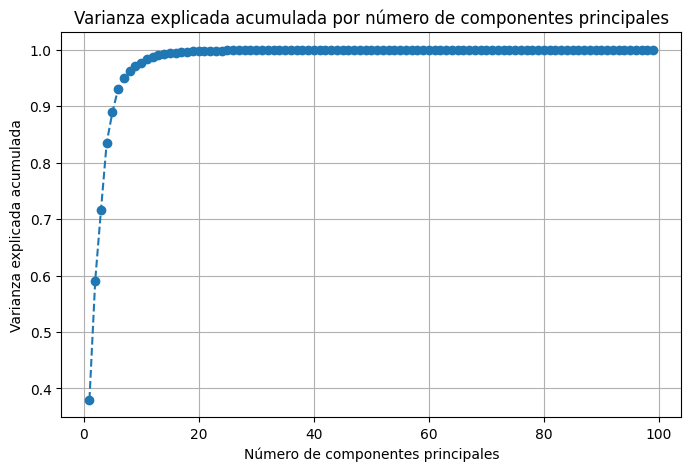

In [61]:
#Calcular la varianza explicada acumulada
data_2=data.drop('label', axis=1)
X = StandardScaler().fit_transform(data_2)
pca = PCA()  # Reduce to 2 dimensions for visualization
pca.fit(X)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

#Imprimir la varianza explicada por cada componente principal
print("Varianza explicada por cada componente principal:")
for i, var_exp in enumerate(explained_variance_ratio):
  if var_exp > 0.001:
    print(f"Componente {i + 1}: {var_exp:.4f}")

#Graficar la varianza acumulada
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Varianza explicada acumulada por número de componentes principales')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulada')
plt.grid(True)
plt.show()

## Reducción de dimensionalidad y gráfica

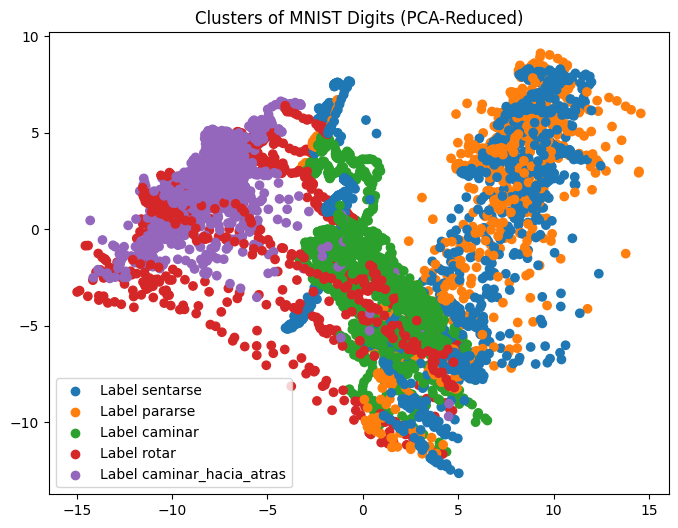

In [62]:
labels = data['label']

data_2=data.drop('label', axis=1)

X = StandardScaler().fit_transform(data_2)

pca = PCA(n_components=8)  # Reduce to 2 dimensions for visualization
reduced_data = pca.fit_transform(X)

# Create a color map for each unique label
unique_labels = labels.unique()
label_colors = {label: plt.get_cmap('tab10')(i) for i, label in enumerate(unique_labels)}

# Assign colors to data points based on their labels
colors = [label_colors[label] for label in labels]


plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=colors)
plt.title("Clusters of MNIST Digits (PCA-Reduced)")

# Create a legend to show which color represents each label
for label, color in label_colors.items():
  plt.scatter([], [], color=color, label=f'Label {label}')

plt.legend()
plt.show()

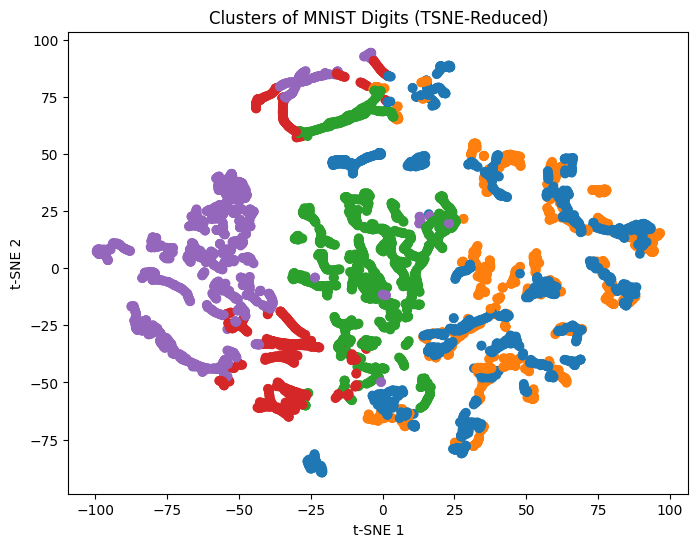

In [63]:
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, init='pca')
tsne_features = tsne.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(tsne_features[:, 0], tsne_features[:, 1], c=colors)
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title("Clusters of MNIST Digits (TSNE-Reduced)")

# Create a legend to show which color represents each label
for label, color in label_colors.items():
  plt.scatter([], [], color=color, label=f'Label {label}')

## Prueba con Kmeans sin etiquetas

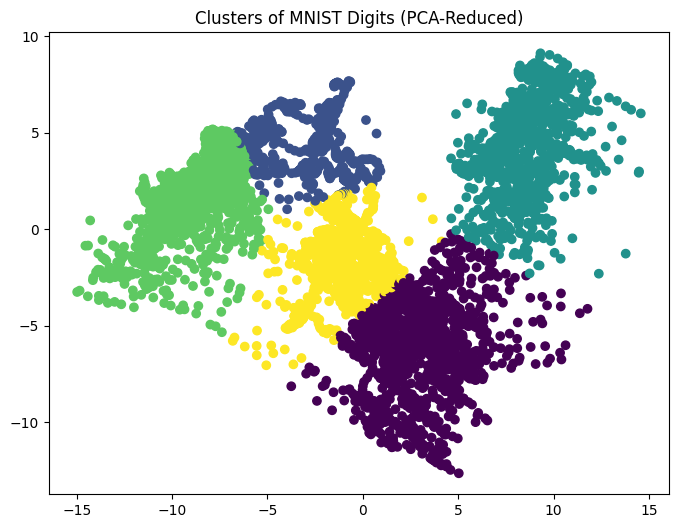

In [64]:
labels = data['label']

data_2=data.drop('label', axis=1)

X = StandardScaler().fit_transform(data_2)

pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
reduced_data = pca.fit_transform(X)
kmeans = KMeans(n_clusters=5, random_state=0,n_init=2)  # 10 clusters for 10 digits
cluster_labels = kmeans.fit_predict(reduced_data)

plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_labels, cmap='viridis')
plt.title("Clusters of MNIST Digits (PCA-Reduced)")
plt.show()

## Agrupación de los fotogramas

In [65]:
result_data = []

# Agrupar por el label
df = data.copy()

grouped = df.groupby('label')

for label, group in grouped:
    # Tomar grupos de 5 frames
    for i in range(0, len(group), 5):
        # Tomar un grupo de 5 frames
        frame_group = group.iloc[i:i + 5]

        # Verificar si hay menos de 5 frames
        if len(frame_group) < 5:
            continue  # Saltar si no hay suficientes frames para completar el grupo

        # Crear un diccionario para almacenar los datos de este grupo
        aggregated_data = {'label': label}

        # Agregar los landmarks de los frames
        for j in range(33):  # Hay 33 landmarks en MediaPipe Pose
            # Obtener las coordenadas x, y, z de cada landmark para cada uno de los 5 frames
            for k in range(5):  # k de 0 a 4 para los 5 frames
                aggregated_data[f'landmark_{j}_x_frame_{k+1}'] = frame_group.iloc[k][f'landmark_{j}_x']
                aggregated_data[f'landmark_{j}_y_frame_{k+1}'] = frame_group.iloc[k][f'landmark_{j}_y']
                aggregated_data[f'landmark_{j}_z_frame_{k+1}'] = frame_group.iloc[k][f'landmark_{j}_z']

        # Agregar el resultado a la lista
        result_data.append(aggregated_data)

# Convertir la lista de resultados a un DataFrame
result_df = pd.DataFrame(result_data)

result_df

,label,landmark_0_x_frame_1,landmark_0_y_frame_1,landmark_0_z_frame_1,landmark_0_x_frame_2,landmark_0_y_frame_2,landmark_0_z_frame_2,landmark_0_x_frame_3,landmark_0_y_frame_3,landmark_0_z_frame_3,...,landmark_32_z_frame_2,landmark_32_x_frame_3,landmark_32_y_frame_3,landmark_32_z_frame_3,landmark_32_x_frame_4,landmark_32_y_frame_4,landmark_32_z_frame_4,landmark_32_x_frame_5,landmark_32_y_frame_5,landmark_32_z_frame_5
0,caminar,0.029804,0.820490,0.413778,0.044800,0.822199,0.409093,0.052937,0.823659,0.393437,...,-0.117881,0.628051,-1.177354,-0.093045,0.648980,-1.163090,-0.139468,0.661604,-1.138686,-0.200136
1,caminar,0.074105,0.841247,0.378512,0.069394,0.850625,0.379879,0.065467,0.856045,0.386910,...,-0.313280,0.658309,-1.107692,-0.332329,0.642969,-1.112860,-0.345415,0.642627,-1.116193,-0.323757
2,caminar,0.040414,0.895595,0.397428,0.020672,0.902559,0.403111,0.003504,0.898985,0.415035,...,-0.424763,0.703724,-0.983492,-0.290193,0.716849,-0.973623,-0.364497,0.726030,-0.972462,-0.470542
3,caminar,-0.069612,0.865440,0.399783,-0.089140,0.848211,0.392602,-0.099990,0.833808,0.375176,...,-0.301590,0.729093,-0.950274,-0.210936,0.727676,-0.937114,-0.154628,0.724083,-0.923800,-0.069266
4,caminar,-0.105965,0.815062,0.343110,-0.110074,0.813689,0.327946,-0.111977,0.812275,0.329705,...,-0.037388,0.717924,-0.911984,-0.025620,0.708316,-0.910693,-0.019276,0.723035,-0.870362,0.034451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1352,sentarse,0.479975,1.098458,-0.136181,0.514612,1.088289,-0.097918,0.587791,1.074638,-0.018912,...,-1.666399,-1.026862,1.582204,-1.578061,-1.015147,1.581945,-1.497983,-1.010376,1.582015,-1.516169
1353,sentarse,0.754542,1.035737,-0.038087,0.759936,1.031276,-0.043928,0.790020,1.024047,-0.027364,...,-1.542312,-1.002893,1.585330,-1.496213,-0.995839,1.587591,-1.501212,-0.981988,1.587768,-1.497854
1354,sentarse,0.849508,1.004637,0.023773,0.870889,0.999420,0.035028,0.865897,0.994146,0.026581,...,-1.482751,-0.963344,1.586417,-1.577966,-0.963434,1.584860,-1.535954,-0.965223,1.583014,-1.494745
1355,sentarse,0.859701,0.979149,0.060565,0.857426,0.973231,0.052639,0.830643,0.974704,-0.005340,...,-1.438135,-0.972675,1.576487,-1.586209,-0.976128,1.576151,-1.663257,-0.983583,1.576088,-1.801192


In [66]:
data.shape

(6793, 100)

## Agrupación de los fotogramas (con redundancia)

In [67]:
result_data = []

# Agrupar por el label
grouped = df.groupby('label')

for label, group in grouped:
    # Tomar grupos de 5 frames con solapamientos
    for i in range(len(group) - 4):  # -4 para asegurarnos de que haya al menos 5 frames
        # Tomar un grupo de 5 frames
        frame_group = group.iloc[i:i + 5]

        # Crear un diccionario para almacenar los datos de este grupo
        aggregated_data = {'label': label}

        # Agregar los landmarks de los frames
        for j in range(33):  # Hay 33 landmarks en MediaPipe Pose
            # Obtener las coordenadas x, y, z de cada landmark para cada uno de los 5 frames
            for k in range(5):  # k de 0 a 4 para los 5 frames
                aggregated_data[f'landmark_{j}_x_frame_{k+1}'] = frame_group.iloc[k][f'landmark_{j}_x']
                aggregated_data[f'landmark_{j}_y_frame_{k+1}'] = frame_group.iloc[k][f'landmark_{j}_y']
                aggregated_data[f'landmark_{j}_z_frame_{k+1}'] = frame_group.iloc[k][f'landmark_{j}_z']

        # Agregar el resultado a la lista
        result_data.append(aggregated_data)

# Convertir la lista de resultados a un DataFrame
result_df_2 = pd.DataFrame(result_data)

result_df_2.shape

(6773, 496)

In [81]:
result_df_2

,label,landmark_0_x_frame_1,landmark_0_y_frame_1,landmark_0_z_frame_1,landmark_0_x_frame_2,landmark_0_y_frame_2,landmark_0_z_frame_2,landmark_0_x_frame_3,landmark_0_y_frame_3,landmark_0_z_frame_3,...,landmark_32_z_frame_2,landmark_32_x_frame_3,landmark_32_y_frame_3,landmark_32_z_frame_3,landmark_32_x_frame_4,landmark_32_y_frame_4,landmark_32_z_frame_4,landmark_32_x_frame_5,landmark_32_y_frame_5,landmark_32_z_frame_5
0,caminar,0.029804,0.820490,0.413778,0.044800,0.822199,0.409093,0.052937,0.823659,0.393437,...,-0.117881,0.628051,-1.177354,-0.093045,0.648980,-1.163090,-0.139468,0.661604,-1.138686,-0.200136
1,caminar,0.044800,0.822199,0.409093,0.052937,0.823659,0.393437,0.062699,0.829009,0.380388,...,-0.093045,0.648980,-1.163090,-0.139468,0.661604,-1.138686,-0.200136,0.664366,-1.135724,-0.230936
2,caminar,0.052937,0.823659,0.393437,0.062699,0.829009,0.380388,0.070817,0.836348,0.381966,...,-0.139468,0.661604,-1.138686,-0.200136,0.664366,-1.135724,-0.230936,0.662284,-1.111841,-0.313280
3,caminar,0.062699,0.829009,0.380388,0.070817,0.836348,0.381966,0.074105,0.841247,0.378512,...,-0.200136,0.664366,-1.135724,-0.230936,0.662284,-1.111841,-0.313280,0.658309,-1.107692,-0.332329
4,caminar,0.070817,0.836348,0.381966,0.074105,0.841247,0.378512,0.069394,0.850625,0.379879,...,-0.230936,0.662284,-1.111841,-0.313280,0.658309,-1.107692,-0.332329,0.642969,-1.112860,-0.345415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6768,sentarse,0.830643,0.974704,-0.005340,0.810020,0.975592,-0.022445,0.758723,0.976577,-0.061112,...,-1.663257,-0.983583,1.576088,-1.801192,-1.004348,1.576110,-1.806441,-1.025230,1.575656,-1.669844
6769,sentarse,0.810020,0.975592,-0.022445,0.758723,0.976577,-0.061112,0.712782,0.977331,-0.074336,...,-1.801192,-1.004348,1.576110,-1.806441,-1.025230,1.575656,-1.669844,-1.033396,1.575503,-1.674438
6770,sentarse,0.758723,0.976577,-0.061112,0.712782,0.977331,-0.074336,0.673890,0.977977,-0.066504,...,-1.806441,-1.025230,1.575656,-1.669844,-1.033396,1.575503,-1.674438,-1.034959,1.575168,-1.653579
6771,sentarse,0.712782,0.977331,-0.074336,0.673890,0.977977,-0.066504,0.640731,0.976724,-0.121809,...,-1.669844,-1.033396,1.575503,-1.674438,-1.034959,1.575168,-1.653579,-1.035591,1.573952,-1.646767


## Varianza por componentes y gráfica de las agrupaciones

Varianza explicada por cada componente principal:
Componente 1: 0.3741
Componente 2: 0.2046
Componente 3: 0.1222
Componente 4: 0.1159
Componente 5: 0.0506
Componente 6: 0.0384
Componente 7: 0.0181
Componente 8: 0.0112
Componente 9: 0.0082
Componente 10: 0.0064
Componente 11: 0.0059
Componente 12: 0.0054
Componente 13: 0.0050
Componente 14: 0.0046
Componente 15: 0.0029
Componente 16: 0.0026
Componente 17: 0.0022
Componente 18: 0.0017
Componente 19: 0.0016
Componente 20: 0.0015
Componente 21: 0.0013
Componente 22: 0.0011


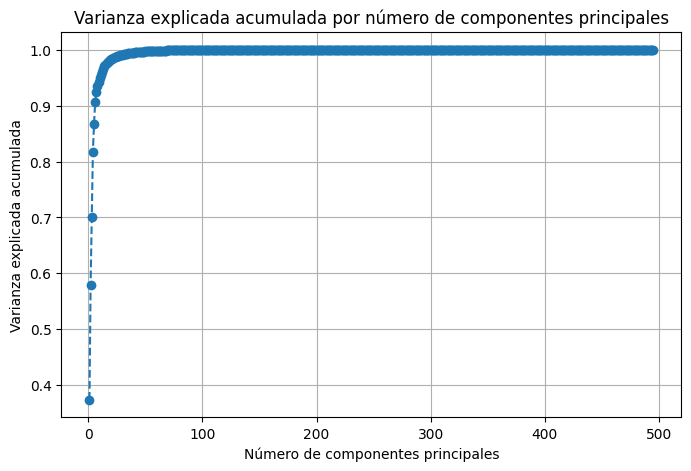

In [69]:
#Calcular la varianza explicada acumulada
data_2=result_df.drop('label', axis=1)
X = StandardScaler().fit_transform(data_2)
pca = PCA()  # Reduce to 2 dimensions for visualization
pca.fit(X)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

#Imprimir la varianza explicada por cada componente principal
print("Varianza explicada por cada componente principal:")
for i, var_exp in enumerate(explained_variance_ratio):
  if var_exp > 0.001:
    print(f"Componente {i + 1}: {var_exp:.4f}")

#Graficar la varianza acumulada
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Varianza explicada acumulada por número de componentes principales')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulada')
plt.grid(True)
plt.show()

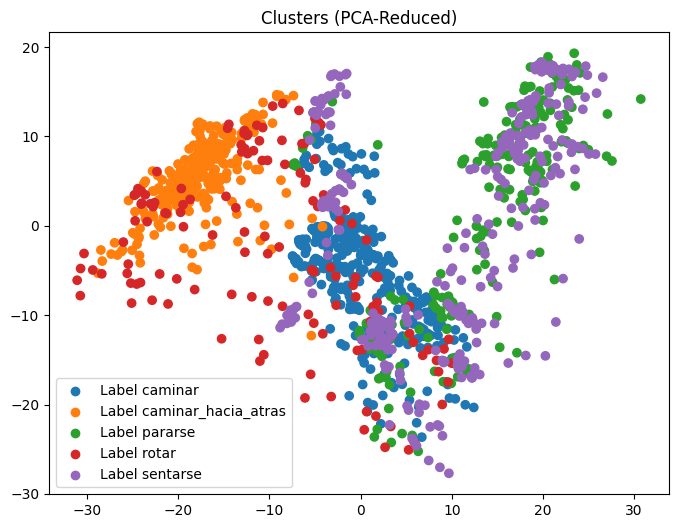

In [70]:
labels = result_df['label']

data_2=result_df.drop('label', axis=1)

X = StandardScaler().fit_transform(data_2)

pca = PCA(n_components=20)  # Reduce to 2 dimensions for visualization
reduced_data = pca.fit_transform(X)

# Create a color map for each unique label
unique_labels = labels.unique()
label_colors = {label: plt.get_cmap('tab10')(i) for i, label in enumerate(unique_labels)}

# Assign colors to data points based on their labels
colors = [label_colors[label] for label in labels]


plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=colors)
plt.title("Clusters (PCA-Reduced)")

# Create a legend to show which color represents each label
for label, color in label_colors.items():
  plt.scatter([], [], color=color, label=f'Label {label}')

plt.legend()
plt.show()


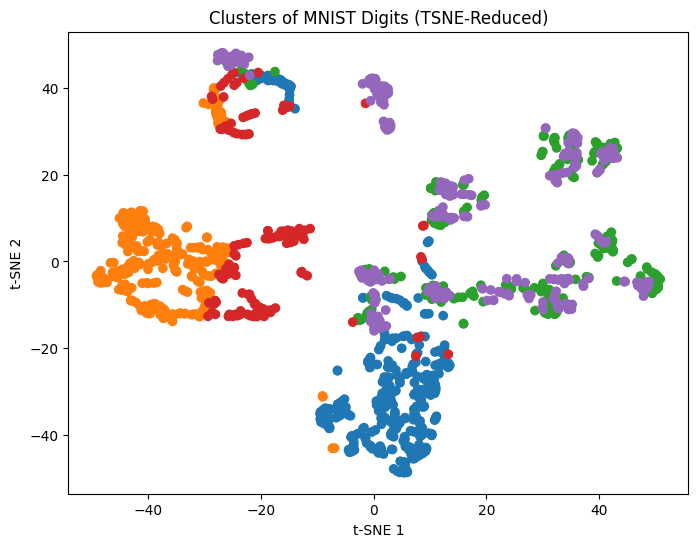

In [71]:
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, init='pca')
tsne_features = tsne.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(tsne_features[:, 0], tsne_features[:, 1], c=colors)
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title("Clusters of MNIST Digits (TSNE-Reduced)")

# Create a legend to show which color represents each label
for label, color in label_colors.items():
  plt.scatter([], [], color=color, label=f'Label {label}')

## Varianza por componentes y gráfica de las agrupaciones con redundancia

Varianza explicada por cada componente principal:
Componente 1: 0.3740
Componente 2: 0.2037
Componente 3: 0.1222
Componente 4: 0.1162
Componente 5: 0.0509
Componente 6: 0.0384
Componente 7: 0.0180
Componente 8: 0.0111
Componente 9: 0.0081
Componente 10: 0.0060
Componente 11: 0.0059
Componente 12: 0.0054
Componente 13: 0.0052
Componente 14: 0.0047
Componente 15: 0.0026
Componente 16: 0.0026
Componente 17: 0.0019
Componente 18: 0.0017
Componente 19: 0.0017
Componente 20: 0.0015
Componente 21: 0.0012
Componente 22: 0.0011
Componente 23: 0.0010


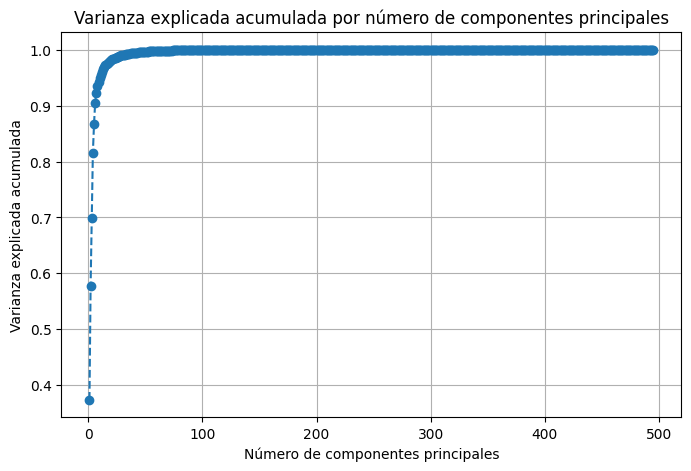

In [72]:
#Calcular la varianza explicada acumulada
data_2=result_df_2.drop('label', axis=1)
X = StandardScaler().fit_transform(data_2)
pca = PCA()  # Reduce to 2 dimensions for visualization
pca.fit(X)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

#Imprimir la varianza explicada por cada componente principal
print("Varianza explicada por cada componente principal:")
for i, var_exp in enumerate(explained_variance_ratio):
  if var_exp > 0.001:
    print(f"Componente {i + 1}: {var_exp:.4f}")

#Graficar la varianza acumulada
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Varianza explicada acumulada por número de componentes principales')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulada')
plt.grid(True)
plt.show()

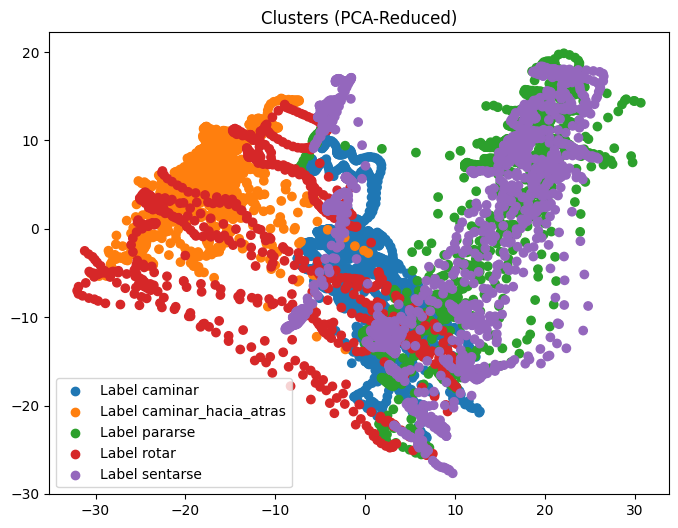

In [73]:
labels = result_df_2['label']

data_2=result_df_2.drop('label', axis=1)

X = StandardScaler().fit_transform(data_2)

pca = PCA(n_components=20)  # Reduce to 2 dimensions for visualization
reduced_data = pca.fit_transform(X)

# Create a color map for each unique label
unique_labels = labels.unique()
label_colors = {label: plt.get_cmap('tab10')(i) for i, label in enumerate(unique_labels)}

# Assign colors to data points based on their labels
colors = [label_colors[label] for label in labels]


plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=colors)
plt.title("Clusters (PCA-Reduced)")

# Create a legend to show which color represents each label
for label, color in label_colors.items():
  plt.scatter([], [], color=color, label=f'Label {label}')

plt.legend()
plt.show()

## Modelos

### SVM

In [85]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Separar las características (X) y las etiquetas (y)
X = result_df_2.drop(columns=['label'])
y = result_df_2['label']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear una instancia del modelo SVC
svm_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)

# Entrenar el modelo
svm_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_svm = svm_model.predict(X_test)

# Evaluar el modelo
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)

print(f'SVM Accuracy: {accuracy_svm}')
print('SVM Classification Report:')
print(report_svm)




SVM Accuracy: 0.9079724409448819
SVM Classification Report:
                     precision    recall  f1-score   support

            caminar       0.95      0.99      0.97       549
caminar_hacia_atras       0.99      0.99      0.99       413
            pararse       0.81      0.73      0.77       378
              rotar       0.97      0.92      0.95       209
           sentarse       0.82      0.87      0.85       483

           accuracy                           0.91      2032
          macro avg       0.91      0.90      0.91      2032
       weighted avg       0.91      0.91      0.91      2032



### Gridsearch SVM

In [82]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Separar las características (X) y las etiquetas (y)
X = result_df_2.drop(columns=['label'])
y = result_df_2['label']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear una instancia del modelo SVC
svm_model = SVC(random_state=42)

# Definir los parámetros para el GridSearch con opciones menos amplias
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

# Crear una instancia de GridSearchCV
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)

# Realizar la búsqueda de hiperparámetros
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros
best_params = grid_search.best_params_
print(f"Mejores parámetros: {best_params}")

# Entrenar el modelo con los mejores parámetros
best_model = grid_search.best_estimator_    

# Realizar predicciones en el conjunto de prueba
y_pred = best_model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Fitting 3 folds for each of 32 candidates, totalling 96 fits
Mejores parámetros: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy: 0.984744094488189
Classification Report:
                     precision    recall  f1-score   support

            caminar       0.99      1.00      0.99       549
caminar_hacia_atras       1.00      1.00      1.00       413
            pararse       0.98      0.97      0.97       378
              rotar       0.99      0.97      0.98       209
           sentarse       0.98      0.98      0.98       483

           accuracy                           0.98      2032
          macro avg       0.98      0.98      0.98      2032
       weighted avg       0.98      0.98      0.98      2032



### RandomForest

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Separar las características (X) y las etiquetas (y)
X = result_df_2.drop(columns=['label'])
y = result_df_2['label']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear una instancia del modelo RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, max_depth=9, random_state=42)

# Entrenar el modelo
rf_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_rf = rf_model.predict(X_test)

# Evaluar el modelo
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

print(f'RandomForestClassifier Accuracy: {accuracy_rf}')
print('RandomForestClassifier Classification Report:')
print(report_rf)

RandomForestClassifier Accuracy: 0.9739173228346457
RandomForestClassifier Classification Report:
                     precision    recall  f1-score   support

            caminar       0.98      1.00      0.99       549
caminar_hacia_atras       1.00      0.99      0.99       413
            pararse       0.99      0.90      0.94       378
              rotar       0.98      0.96      0.97       209
           sentarse       0.93      1.00      0.96       483

           accuracy                           0.97      2032
          macro avg       0.98      0.97      0.97      2032
       weighted avg       0.98      0.97      0.97      2032



### Gridsearch RandomForest

In [92]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Separar las características (X) y las etiquetas (y)
X = result_df_2.drop(columns=['label'])
y = result_df_2['label']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear una instancia del modelo RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Definir los parámetros para el GridSearch con opciones menos amplias
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [9, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Crear una instancia de GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)

# Realizar la búsqueda de hiperparámetros
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros
best_params = grid_search.best_params_
print(f"Mejores parámetros: {best_params}")

# Entrenar el modelo con los mejores parámetros
best_model = grid_search.best_estimator_

# Realizar predicciones en el conjunto de prueba
y_pred = best_model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Mejores parámetros: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.9798228346456693
Classification Report:
                     precision    recall  f1-score   support

            caminar       0.99      1.00      0.99       549
caminar_hacia_atras       1.00      0.99      0.99       413
            pararse       0.99      0.93      0.96       378
              rotar       0.98      0.97      0.98       209
           sentarse       0.95      0.99      0.97       483

           accuracy                           0.98      2032
          macro avg       0.98      0.98      0.98      2032
       weighted avg       0.98      0.98      0.98      2032



### XGBoost

In [88]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Separar las características (X) y las etiquetas (y)
X = result_df_2.drop(columns=['label'])
y = result_df_2['label']

# Codificar las etiquetas
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Crear una instancia del modelo XGBClassifier
model = xgb.XGBClassifier(
    eval_metric='mlogloss',
    n_estimators=100,  # Número de árboles
    max_depth=6,  # Profundidad máxima de los árboles
    scale_pos_weight=1,
    learning_rate=0.1)

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

c:\Users\Brayan\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:39:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9891732283464567
Classification Report:
                     precision    recall  f1-score   support

            caminar       0.99      0.99      0.99       549
caminar_hacia_atras       1.00      0.98      0.99       413
            pararse       0.99      1.00      0.99       378
              rotar       0.95      0.98      0.96       209
           sentarse       0.99      0.99      0.99       483

           accuracy                           0.99      2032
          macro avg       0.99      0.99      0.99      2032
       weighted avg       0.99      0.99      0.99      2032



### Gridsearch XGBoost

In [84]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Separar las características (X) y las etiquetas (y)
X = result_df_2.drop(columns=['label'])
y = result_df_2['label']

# Codificar las etiquetas
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Crear una instancia del modelo XGBClassifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Definir los parámetros para el GridSearch con opciones menos amplias
param_grid = {
    'n_estimators': [200],
    'max_depth': [9],
    'scale_pos_weight': [1, 1.5, 2, 2.5],
    'learning_rate': [0.01, 0.05, 0.1, 0.15]
}

# Crear una instancia de GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)

# Realizar la búsqueda de hiperparámetros
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros
best_params = grid_search.best_params_
print(f"Mejores parámetros: {best_params}")

# Entrenar el modelo con los mejores parámetros
best_model = grid_search.best_estimator_

# Realizar predicciones en el conjunto de prueba
y_pred = best_model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


c:\Users\Brayan\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:34:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Mejores parámetros: {'learning_rate': 0.15, 'max_depth': 9, 'n_estimators': 200, 'scale_pos_weight': 1}
Accuracy: 0.9911417322834646
Classification Report:
                     precision    recall  f1-score   support

            caminar       0.99      0.99      0.99       549
caminar_hacia_atras       1.00      0.98      0.99       413
            pararse       0.99      1.00      0.99       378
              rotar       0.96      0.99      0.97       209
           sentarse       1.00      0.99      0.99       483

           accuracy                           0.99      2032
          macro avg       0.99      0.99      0.99      2032
       weighted avg       0.99      0.99      0.99      2032

